##Task 1 - Exploratory Data Analysis (EDA)

1. Outline the steps taken in the EDA process
- 1.1. Get or collect data
  - decided on DB, and library (pandas)
  - Loaded data for processing
  - All data can be located and loaded for processing
  - Determine the size/shape of data and types of information it contains.

- 1.2. Manipulate and process data
  - Identify and remove duplicate data (ie. last ~80 rows)
  - Identify missing data (ie. 384 missing membership information)
  - identify odd looking data (ie. 214 Cars with negative RPM)
    - Assumes the negative RPMs are not alternate rotation direction, that it is a sensor abnormaily.
  - Drop rows with missing values and negative RPM to have cleaner data
  - Removed noisy or missing data points to have a clearer representation. 
  - Converted temperature to Celsius
    - Corrected data type (Str to Float)
  - remove outlier with 200++ temperature
- 1.3. Model and Analysis
  - Plot coorelation to identify places of interest. 
  - Decision branch from Failure information, we assess each failure and identify possible direciton of investigation/possilble action.
- 1.4. Visualize, evaluate, present, and communicate
  - Refer [full cleaned up Visulization](https://colab.research.google.com/drive/1JS1vvaWZmALMTGaoLjDVztIiSGjWGxlV#scrollTo=vfdRJ6Y0HHGn&line=4&uniqifier=1) & [Analysis](https://colab.research.google.com/drive/1JS1vvaWZmALMTGaoLjDVztIiSGjWGxlV#scrollTo=GWYXbm_M7H3l&line=4&uniqifier=1)
  - [General Observation and Top line Failure rate report](https://colab.research.google.com/drive/1JS1vvaWZmALMTGaoLjDVztIiSGjWGxlV#scrollTo=2GE-zorrMlRm&line=1&uniqifier=1)
    - Model 3s from 2011, 2012, 2013 have significant failure rates, which shows up in Failure A, C, D of the data. 
    - RPM may have some bearing on Failure B and D
    - Fuel may have relationship with Failures A and E
    - Unable to find significant relationship between failures and:
      - Factory location
      - Usage location
      - Membership

2. Explain the purpose of each step
- i. Get or collect data: This step involves obtaining the data that will be analyzed. This could involve extracting data from a database, scraping data from a website, or collecting data through a survey or experiment. The goal of this step is to acquire a dataset that is relevant to the research question or problem being studied.

- ii. Manipulate and process data: After the data is collected, it often needs to be cleaned, transformed, and prepared for analysis. This step may include tasks such as removing missing or duplicate data, handling outliers, and converting data into a format that can be analyzed. The goal of this step is to create a dataset that is ready for analysis and is free of any errors or inaccuracies.

- iii. Model and Analysis: Once the data is prepared, it can be analyzed using statistical and machine learning techniques. This step may include tasks such as building models, running hypothesis tests, and generating descriptive statistics. The goal of this step is to extract insights and knowledge from the data that can be used to answer the research question or solve the problem being studied.

- iv. Visualize, evaluate, present and communicate: After the data has been analyzed, it is important to present the findings in a clear and concise manner. This step may include tasks such as creating visualizations, writing reports, and communicating the findings to stakeholders. The goal of this step is to effectively communicate the insights and knowledge gained from the analysis to the appropriate audience in a way that is easy to understand and actionable.

 
3. Explain the conclusions drawn from each step

- i. Get or collect data:
  - Verified ability to injest the data from the source provided
  - Decided to use SQLite and Pandas
  - Determined the shape and size of the data and types of information it has (using pandas function like .shape & .info)
- ii. Manipulate and Process Data
  - Concluded that data needed to be cleaned and transformed data for analysis. 
  - ie. Duplicate data, missing membership information, negative RPM, Converting temperature
- iii. Model and Analysis
  - Concluded that there were relatively more coorelation between fuel consumption, RPM and temperature using .corr() function
  -  determined shape of data with various histograms and plots.
  - Determined if there were data of interest uing .unique(), .describe(), .info()
  - Decided the best way to visulize models and year was to take them separately as 41 different models (instead of splitting them into permutation of model and year).

- iv. Visulize, evaluate, present and communicate
  - Placed all findings on the top of the page for ease of access
  - Working, information and appendix are below to back up and support findings.


4. Explain the interpretation of the various statistics generated and how they impact your analysis 
  - Because of low number data sets for some models, the author decided to keep an lower limit on sample size of >100 samples.
  - Model 3 has a high failure rate, there were some model 5 too.
    - Failure A: For ['Model 3, 2012']: 39 failures out of 543 total built or 7.182%
    - Failure A: For ['Model 3, 2011']: 26 failures out of 194 total built or 13.402%
    - Failure C: For ['Model 3, 2013']: 26 failures out of 517 total built or 5.029%
    - Failure C: For ['Model 5, 2016']: 14 failures out of 280 total built or 5.000%
    - Failure D: For ['Model 3, 2011']: 14 failures out of 194 total built or 7.216%
    - Failures B and E are of lower priority relatively as the failure rates are lower than A, C, D.


5. Generate clear, meaningful, and understandable visualizations that support your findings 
6. Organize the notebook so that is it clear and easy to understand


### 1.1 Get or collect data

In [414]:
#injest data:
import os
import pandas as pd
import requests

if not os.path.exists("data"):
    os.makedirs("data")

url = "https://techassessment.blob.core.windows.net/aiap13-assessment-data/failure.db"
response = requests.get(url)
open("data/failure.db", "wb").write(response.content)

# Connect to the database
import sqlite3
conn = sqlite3.connect('data/failure.db')

# Read the data into a DataFrame
df = pd.read_sql_query("SELECT * from failure", conn)

###### Verify SQL using Pandas (to be deleted)

In [415]:
#Quick peak at data schema
import pandas as pd
pd.read_sql(""" SELECT *
                FROM failure
                LIMIT 3;""",
           sqliteConnection)

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0


In [416]:
#Quick peak at data schema
import pandas as pd
pd.read_sql(""" SELECT *
                FROM failure
                LIMIT 3;""",
           sqliteConnection)

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0


In [417]:
# checking CAR ID
pd.read_sql("""SELECT * FROM failure
               WHERE "Car ID" IS "137b948a-c99f-4afa-a2a7-9ef65ae51e8f";""",
           sqliteConnection)

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0


In [418]:
#count records to guage database size
pd.read_sql("""SELECT COUNT(*)
               FROM failure;""",
           sqliteConnection)

,COUNT(*)
0,10081


In [419]:
# checking for missing values in one column
pd.read_sql("""SELECT COUNT(*)
               FROM failure
               WHERE "Car ID" IS NULL;""",
           sqliteConnection)

,COUNT(*)
0,0


In [420]:
# checking for missing values in all columns
pd.read_sql("""SELECT COUNT(*) - COUNT("Car ID") AS missing_CarID,
                      COUNT(*) - COUNT(Model) AS missing_Model,
                      COUNT(*) - COUNT(Color) AS missing_Color,
                      COUNT(*) - COUNT(Temperature) AS missing_Temperature,
                      COUNT(*) - COUNT(RPM) AS missing_RPM,
                      COUNT(*) - COUNT(Factory) AS missing_Factory,
                      COUNT(*) - COUNT(Usage) AS missing_Usage,
                      COUNT(*) - COUNT("Fuel consumption") AS Fuel_consumption,
                      COUNT(*) - COUNT(Color) AS missing_Color,
                      COUNT(*) - COUNT(Membership) AS missing_Membership,
                      COUNT(*) - COUNT("Failure A") AS missing_FailureA,
                      COUNT(*) - COUNT("Failure B") AS missing_FailureB, 
                      COUNT(*) - COUNT("Failure C") AS missing_FailureC, 
                      COUNT(*) - COUNT("Failure D") AS missing_FailureD, 
                      COUNT(*) - COUNT("Failure E") AS missing_FailureE 
                FROM failure;""",
           sqliteConnection)

,missing_CarID,missing_Model,missing_Color,missing_Temperature,missing_RPM,missing_Factory,missing_Usage,Fuel_consumption,missing_Color,missing_Membership,missing_FailureA,missing_FailureB,missing_FailureC,missing_FailureD,missing_FailureE
0,0,0,0,0,0,0,0,0,0,384,0,0,0,0,0


###### View all data 

Shape of DataFrame: (10081, 14)
Data Types of Columns: 
Car ID               object
Model                object
Color                object
Temperature          object
RPM                   int64
Factory              object
Usage                object
Fuel consumption    float64
Membership           object
Failure A             int64
Failure B             int64
Failure C             int64
Failure D             int64
Failure E             int64
dtype: object
Basic Statistics of Numerical Columns: 
                RPM  Fuel consumption     Failure A     Failure B  \
count  10081.000000      10081.000000  10081.000000  10081.000000   
mean    1470.626823        679.472304      0.025692      0.018550   
std      487.502419         58.486101      0.158222      0.134935   
min    -2636.000000        598.500000      0.000000      0.000000   
25%     1418.000000        638.800000      0.000000      0.000000   
50%     1499.000000        668.500000      0.000000      0.000000   
75%     1609.00

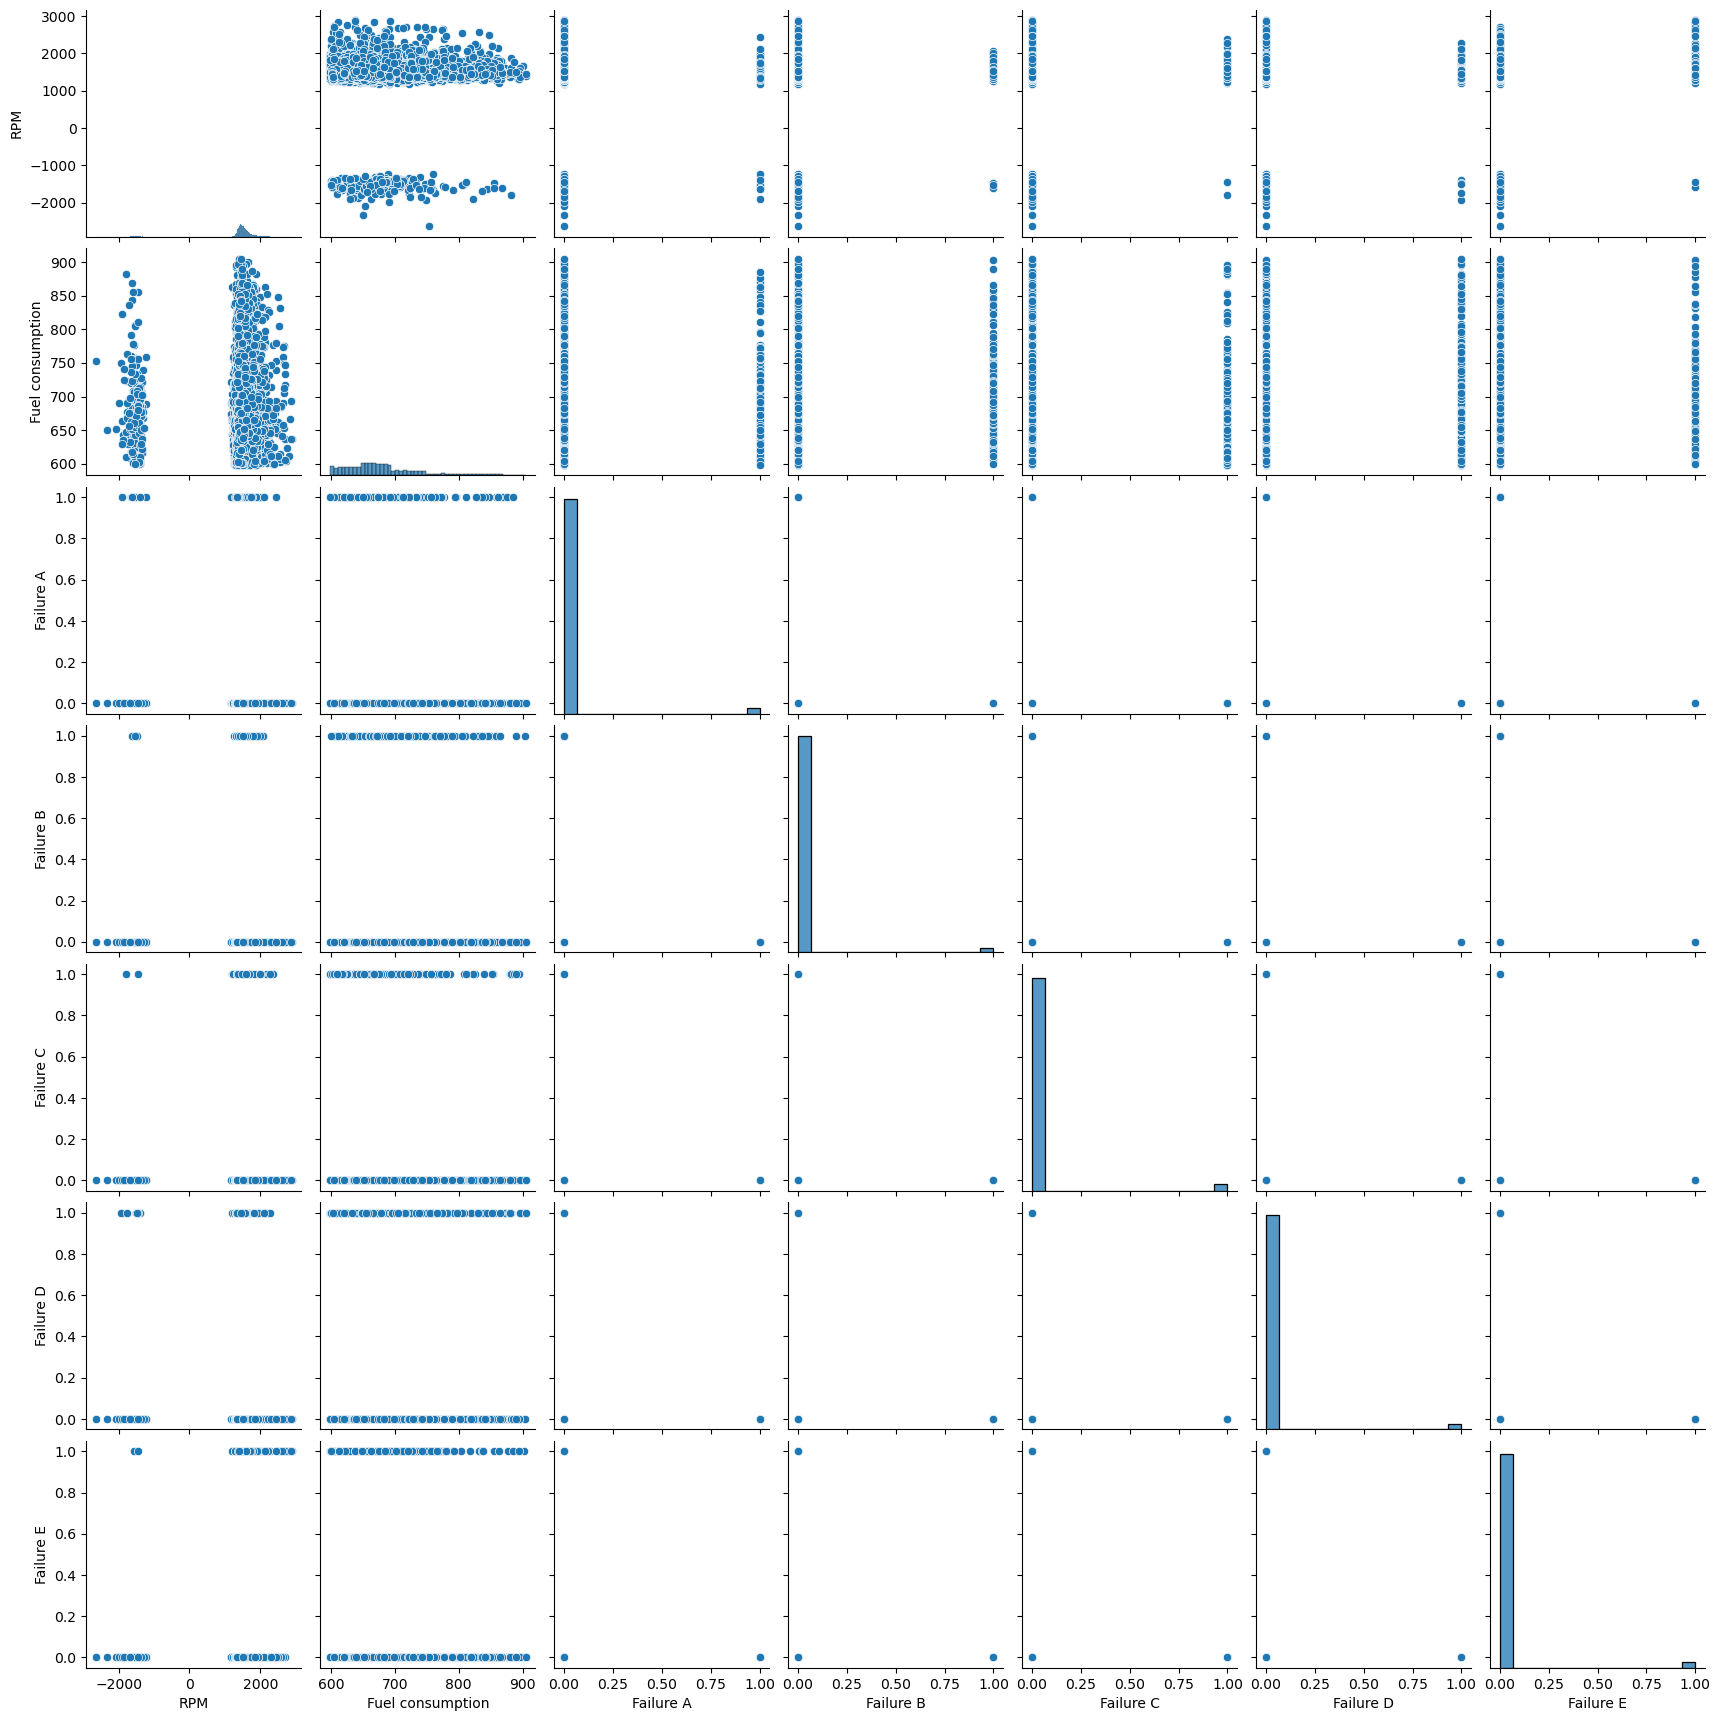

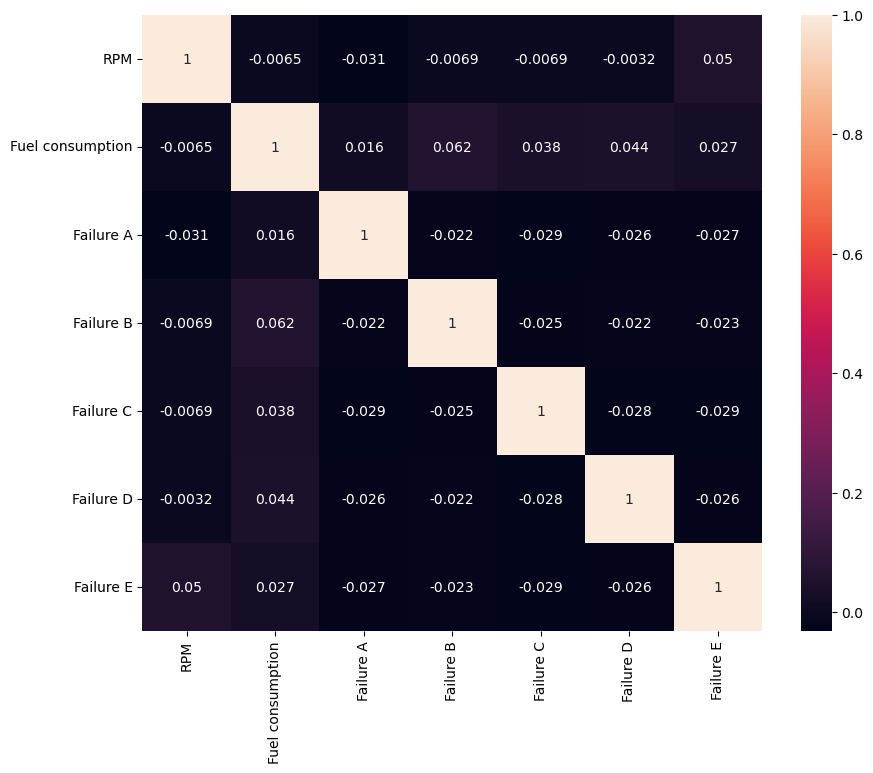

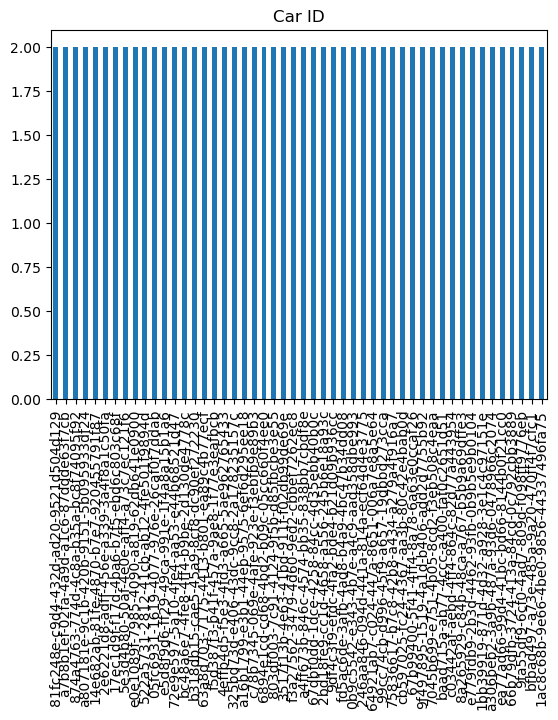

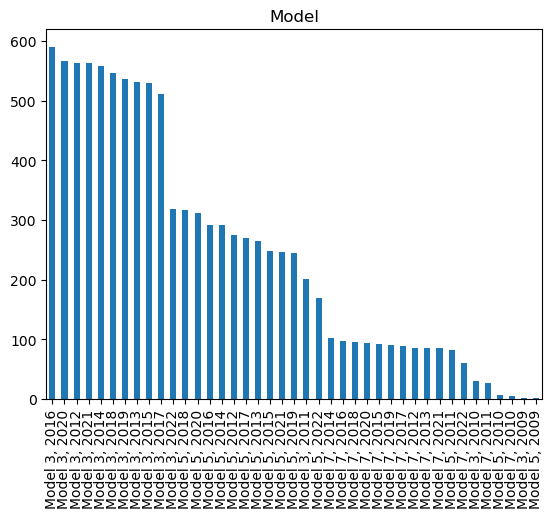

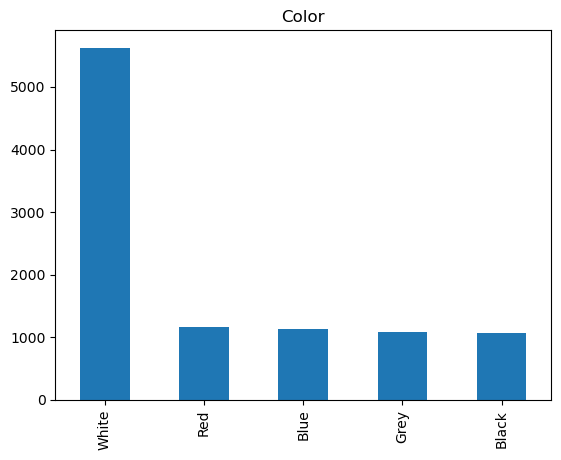

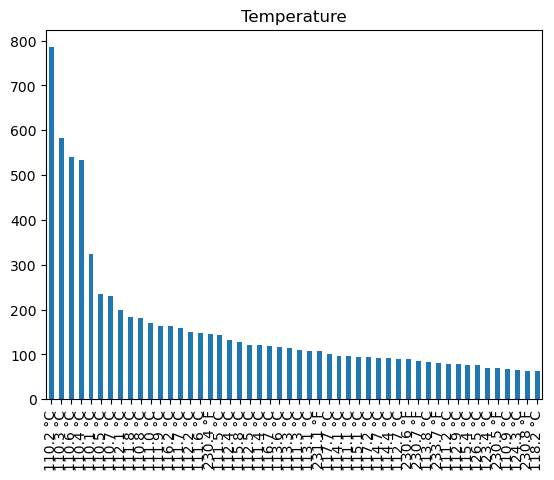

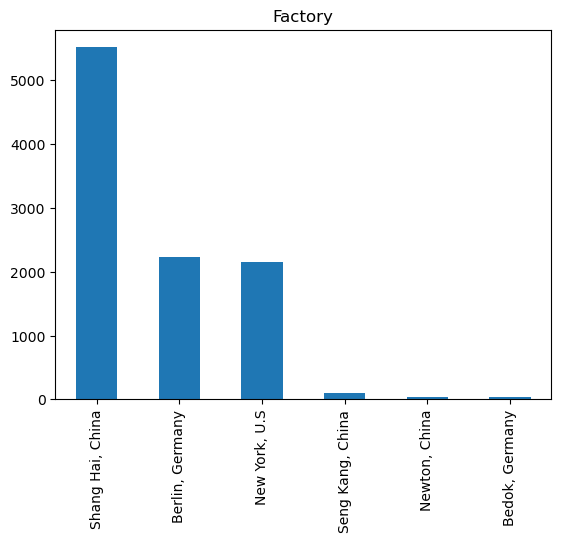

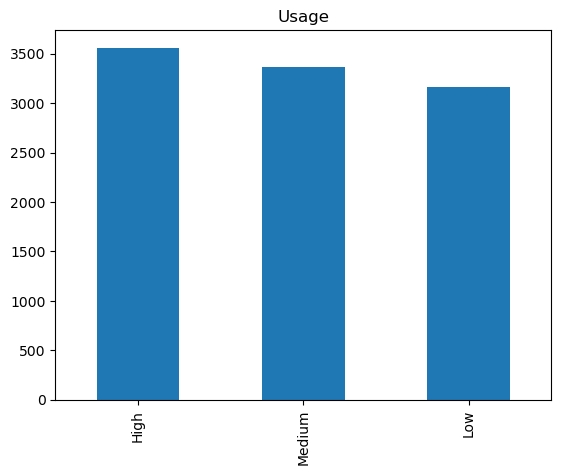

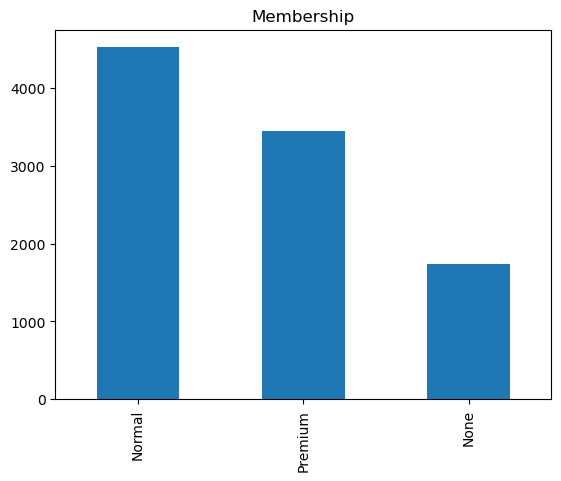

In [421]:
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

# Get the shape of the DataFrame
print(f'Shape of DataFrame: {df.shape}')

# Get the column types
print(f'Data Types of Columns: \n{df.dtypes}')

# Get the basic statistics of the numerical columns
print(f'Basic Statistics of Numerical Columns: \n{df.describe()}')

# Get the value counts of the categorical columns
print(f'Value Counts of Categorical Columns: \n{df.select_dtypes(include="object").apply(pd.Series.value_counts)}')

# Check for missing values
print(f'Missing Values: \n{df.isnull().sum()}')

# Check for duplicate rows
print(f'Duplicate Rows: {df.duplicated().sum()}')

# Create a pairplot to visualize the relationship between numerical columns
sns.pairplot(df)
plt.show()

# Create a heatmap to visualize the correlation between numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# # Create a bar plot to visualize the distribution of categorical columns
# df.select_dtypes(include="object").apply(pd.Series.value_counts).plot(kind='bar', stacked=True)
# plt.show()

# Create a bar plot for each categorical column separately, but limit the number of categories plotted
n = 50
for column in df.select_dtypes(include="object").columns:
    df[column].value_counts().head(n).plot(kind='bar')
    plt.title(column)
    plt.show()

### 1.2 Manipulate and Process Data

###### Remove duplicate data

Car ID doesn't add up to total number, need to idenitfy and remove duplicates:

In [422]:
dfDroppedDuplicates=df.drop_duplicates()

In [423]:
 pd.reset_option("^display")

In [424]:
#Dropped Duplicated Car IDs/Rows
dfDroppedDuplicates.shape

(10000, 14)

###### Dropping rows with missing values

In [425]:
dfDroppedDuplicates.shape

(10000, 14)

In [426]:
dfDroppedDuplicates.isnull().sum()

Car ID                0
Model                 0
Color                 0
Temperature           0
RPM                   0
Factory               0
Usage                 0
Fuel consumption      0
Membership          383
Failure A             0
Failure B             0
Failure C             0
Failure D             0
Failure E             0
dtype: int64

In [427]:
dfDroppedMissingAndDuplicated=dfDroppedDuplicates.dropna(how='any', inplace=False)

In [428]:
dfDroppedMissingAndDuplicated.shape

(9617, 14)

In [429]:
#verify no more missing values
dfDroppedMissingAndDuplicated.isnull().sum()

Car ID              0
Model               0
Color               0
Temperature         0
RPM                 0
Factory             0
Usage               0
Fuel consumption    0
Membership          0
Failure A           0
Failure B           0
Failure C           0
Failure D           0
Failure E           0
dtype: int64

###### Remove negative values - Find and replace (to be hidden, can't do int though)

In [430]:
#remove negative missing values:
dfDroppedMissing_Duplicated_NegativeRPM=dfDroppedMissingAndDuplicated[dfDroppedMissingAndDuplicated['RPM'] >= 0]

#should be less than 9617(dfDroppedMissingAndDuplicated)
print(dfDroppedMissing_Duplicated_NegativeRPM.shape)

#verify that no negative values left:
dfDroppedMissing_Duplicated_NegativeRPM[dfDroppedMissing_Duplicated_NegativeRPM['RPM'] <= 1200]

(9406, 14)


,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
994,1008ed3c-9886-46b0-a373-567fee7d8e7d,"Model 5, 2013",White,110.1 °C,1168,"Shang Hai, China",High,690.9,None,0,0,0,0,0
3584,2af2e2d5-c021-439a-a740-d3d16a458491,"Model 3, 2015",White,237.9 °F,1192,"Newton, China",High,644.9,None,0,0,0,1,0
6404,0726c9fe-b2ca-429a-bd8d-3e207a60aeb5,"Model 5, 2014",Grey,111.5 °C,1183,"Shang Hai, China",Medium,674.7,Normal,0,0,0,0,0
8437,ea984837-6411-4ffc-9391-4d631cfa0ca3,"Model 3, 2012",White,110.5 °C,1181,"Berlin, Germany",High,721.6,None,1,0,0,0,0


###### Convert Temperature into float


In [431]:
dfDroppedMissing_Duplicated_NegativeRPM.Temperature

0       110.3 °C
1       110.4 °C
2       110.3 °C
3       110.4 °C
4       230.7 °C
          ...   
9993    110.6 °C
9994    110.6 °C
9997    110.6 °C
9998    231.1 °F
9999    110.6 °C
Name: Temperature, Length: 9406, dtype: object

In [432]:
#Change into string without ° for either
dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat = dfDroppedMissing_Duplicated_NegativeRPM.copy()
dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat['Temperature'] = dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat['Temperature'].str.replace('°C','C')
dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat['Temperature'] = dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat['Temperature'].str.replace('°F','F')

#Convert all temp with F to Celcius value
dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat_NoF=dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat['Temperature'] = dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat['Temperature'].str.replace('F','')
dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat.loc[~dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat['Temperature'].str.contains('C', na=False), 'Temperature'] = ((dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat.loc[~dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat['Temperature'].str.contains('C', na=False), 'Temperature'].astype(float) - 32) * (5/9)).round(1)

#drop the rest of C, Convert into float
dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat.loc[dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat['Temperature'].str.contains('C', na=False), 'Temperature'] = dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat.loc[dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat['Temperature'].str.contains('C', na=False), 'Temperature'].str.replace('C','')
dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat['Temperature'] = pd.to_numeric(dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat['Temperature'], errors='coerce')
dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat.head(5)

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0


In [433]:
#Clean data
dfClean=dfDroppedMissing_Duplicated_NegativeRPM_TempToFloat
dfClean.shape

(9406, 14)

### 1.3 Model and Analysis

###### View all, with data cleaned

In [434]:
dfClean.shape

(9406, 14)

In [435]:
#load only failed data into full view
# Added a column, to identify any failure
dfClean = dfClean.copy()
dfClean.loc[:,'Any Failure'] = (dfClean[['Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E']] == 1).any(axis=1).astype(int)

Shape of DataFrame: (9406, 15)
Data Types of Columns: 
Car ID               object
Model                object
Color                object
Temperature         float64
RPM                   int64
Factory              object
Usage                object
Fuel consumption    float64
Membership           object
Failure A             int64
Failure B             int64
Failure C             int64
Failure D             int64
Failure E             int64
Any Failure           int64
dtype: object
Basic Statistics of Numerical Columns: 
       Temperature          RPM  Fuel consumption    Failure A    Failure B  \
count  9406.000000  9406.000000       9406.000000  9406.000000  9406.000000   
mean    113.100457  1538.692324        678.797906     0.020519     0.013077   
std       4.673897   175.252007         58.087537     0.141774     0.113610   
min     110.000000  1168.000000        598.500000     0.000000     0.000000   
25%     110.400000  1424.000000        638.500000     0.000000     0.000000 

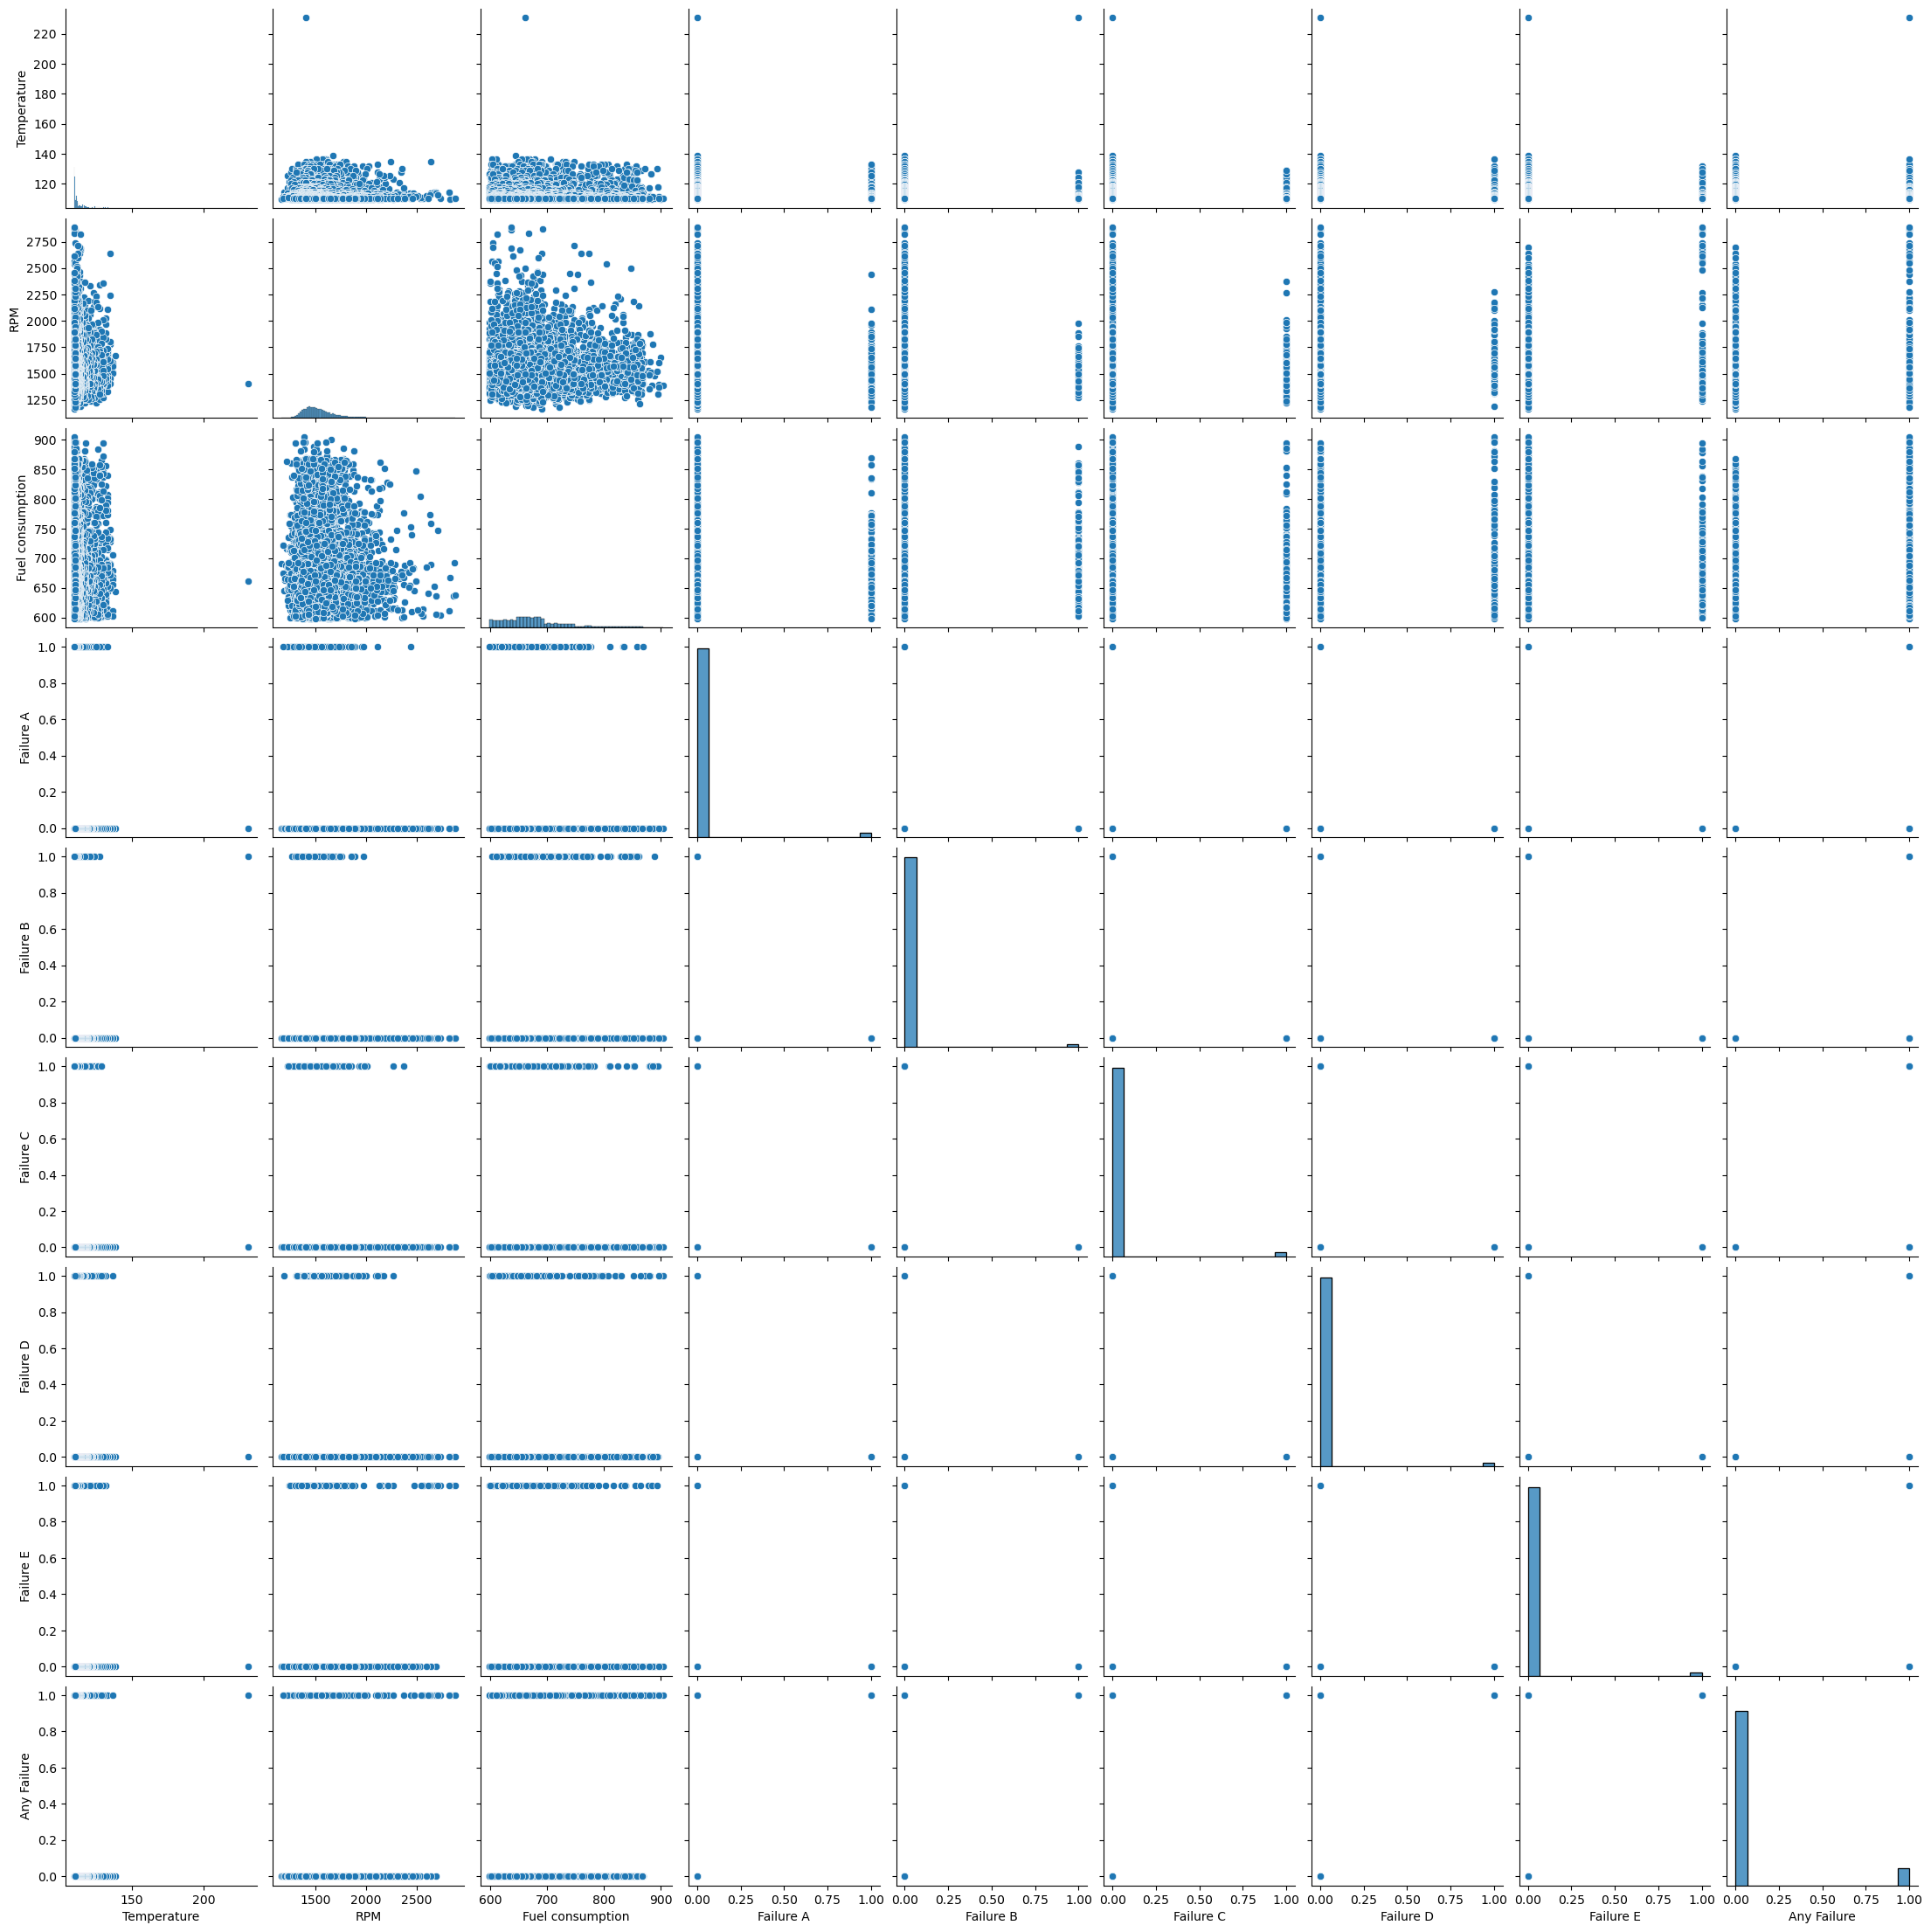

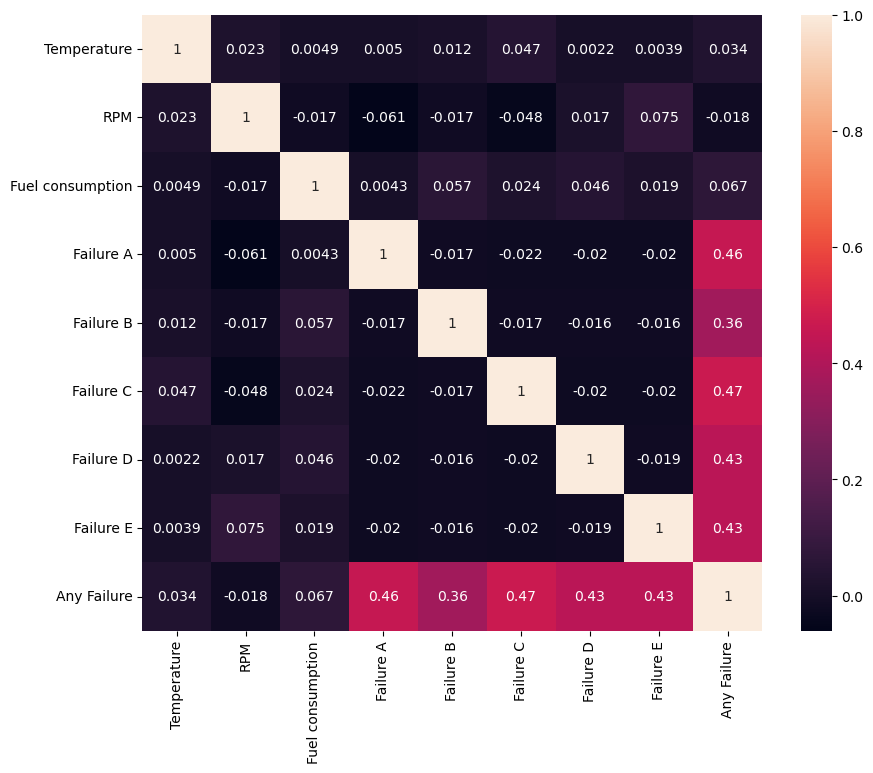

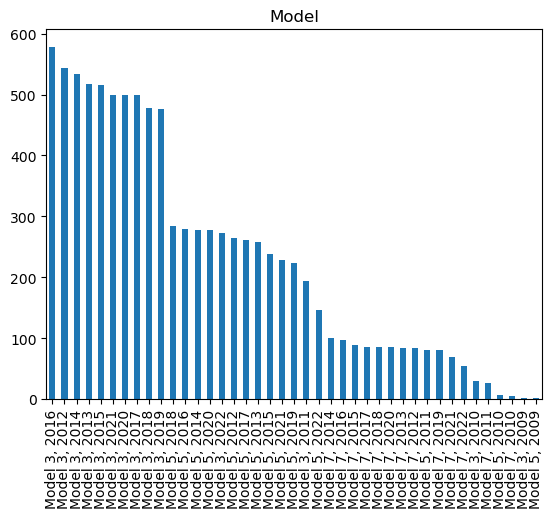

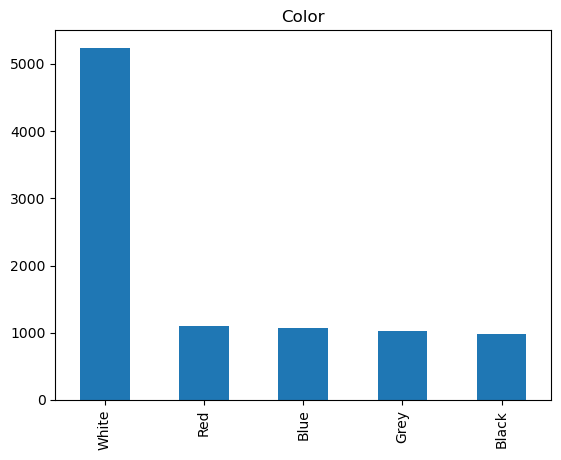

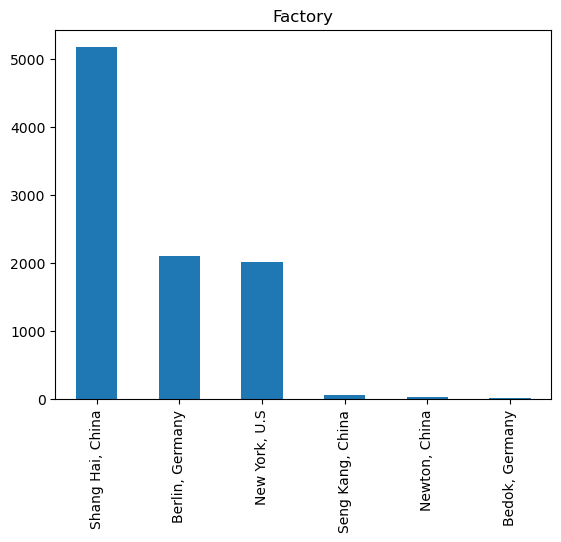

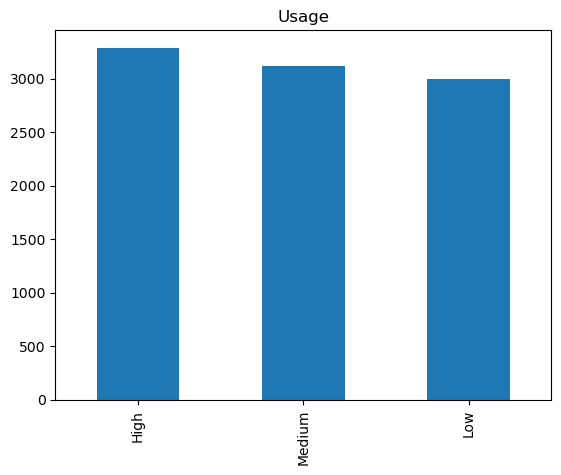

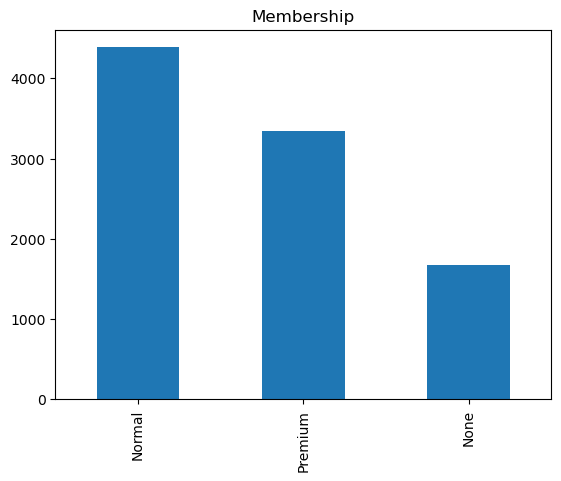

In [436]:
# Get the shape of the DataFrame
print(f'Shape of DataFrame: {dfClean.shape}')

# Get the column types
print(f'Data Types of Columns: \n{dfClean.dtypes}')

# Get the basic statistics of the numerical columns
print(f'Basic Statistics of Numerical Columns: \n{dfClean.describe()}')

# Get the value counts of the categorical columns
print(f'Value Counts of Categorical Columns: \n{dfClean.select_dtypes(include="object").apply(pd.Series.value_counts)}')

# Check for missing values
print(f'Missing Values: \n{dfClean.isnull().sum()}')

# Check for duplicate rows
print(f'Duplicate Rows: {dfClean.duplicated().sum()}')

# Create a pairplot to visualize the relationship between numerical columns
sns.pairplot(dfClean)
plt.show()

# Create a heatmap to visualize the correlation between numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(dfClean.corr(), annot=True)
plt.show()

# # Create a bar plot to visualize the distribution of categorical columns
# dfClean.select_dtypes(include="object").apply(pd.Series.value_counts).plot(kind='bar', stacked=True)
# plt.show()

# Create a bar plot for each categorical column separately, but limit the number of categories plotted
n = 41
for column in dfClean.select_dtypes(include="object").columns:
    if column != "Car ID":
        dfClean[column].value_counts().head(n).plot(kind='bar')
        plt.title(column)
        plt.show()

In [437]:
#Data Cleaning, removing outlier, because is the only single issue, which should be investigated separately:

#Identify temperature above 200, remove and run full view again.
print(f"deleted:\n",dfClean.loc[dfClean['Temperature'] >= 200])
dfClean = dfClean.loc[dfClean['Temperature'] <= 200]

#--- The rest are not outliers
#Identify RMP >2000 and run full view again
#dfClean.loc[dfClean['RPM'] >= 2000]
# dfClean = dfClean.loc[dfClean['RPM'] <= 2000]

#Identify Fuel consumption >900 and run full view again
#dfClean.loc[dfClean['Fuel consumption'] >= 900]
# dfClean = dfClean.loc[dfClean['Fuel Consumption'] <= 2000]


deleted:
                                  Car ID          Model  Color  Temperature  \
4  10484506-1be0-4a86-8dbc-b8b2092b93b2  Model 3, 2022  White        230.7   

    RPM        Factory Usage  Fuel consumption Membership  Failure A  \
4  1408  New York, U.S  High             660.9     Normal          0   

   Failure B  Failure C  Failure D  Failure E  Any Failure  
4          1          0          0          0            1  


- There are out Outlier in Temperature, RPM, Fuel consumption
  - Observed from Max and 75 percentile even after data is cleaned.
  - Removed and re-rendered view
    - Single out lier where temperature runs >200
- *Assume Synthetic features in the dataset that should be used for the purposes of this excercise. We assume the factory to be real cities. 
  - (ie. Newton & Seng Kang China and Bedok Germany)
- More than half the cars are built in Shang Hai, China. 
- about 2000 in Berlin & New York
- With minimal n.o of cars built in Seng Kang, Newton, Bedok.
  - Assumed they are actual places for purposes of this excercise

- Model 3 seem to have been built more frequently than other models
  - Model 3, 2016, 2012, 2014, 2013, 2015, 2021, 2020, 2017, 2018, 2019 have higher than normal occurance in the data set

- Model 5 second most built followed by Model 7

- There seem to be relatively more coorelation between the following that could be worth investigating: 
  - Fuel consumption and Failure B 
  - RPM and Failure E


### 1.4. Visualize, evaluate, present, and communicate

Branching from Failure information, we assess each failure and identify possible direciton of investigation/possilble action.

In [438]:
FailureFrequency = dfClean[dfClean.iloc[:, 9:] >= 1]
#number of failures
FailureFrequency.iloc[:, 9:].count()

Failure A      193
Failure B      122
Failure C      205
Failure D      171
Failure E      171
Any Failure    862
dtype: int64

In [439]:
#load only failed data into full view
dfClean_failures=dfClean
# dfClean_failures['Any Failure'] = (dfClean_failures[['Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E']] == 1).any(axis=1).astype(int)
dfClean_failures = dfClean_failures[dfClean_failures['Any Failure'] == 1]
# #drop 'Any failure' column if required:
# dfClean_failures = dfClean_failures.drop(columns = ['Any Failure'])

###### View all dashboard for failed Cars

Shape of DataFrame: (862, 15)
Data Types of Columns: 
Car ID               object
Model                object
Color                object
Temperature         float64
RPM                   int64
Factory              object
Usage                object
Fuel consumption    float64
Membership           object
Failure A             int64
Failure B             int64
Failure C             int64
Failure D             int64
Failure E             int64
Any Failure           int64
dtype: object
Basic Statistics of Numerical Columns: 
       Temperature          RPM  Fuel consumption   Failure A   Failure B  \
count   862.000000   862.000000        862.000000  862.000000  862.000000   
mean    113.461717  1528.867749        691.052320    0.223898    0.141531   
std       4.582857   239.764264         62.992717    0.417096    0.348771   
min     110.100000  1181.000000        598.500000    0.000000    0.000000   
25%     110.400000  1377.250000        646.050000    0.000000    0.000000   
50%     11

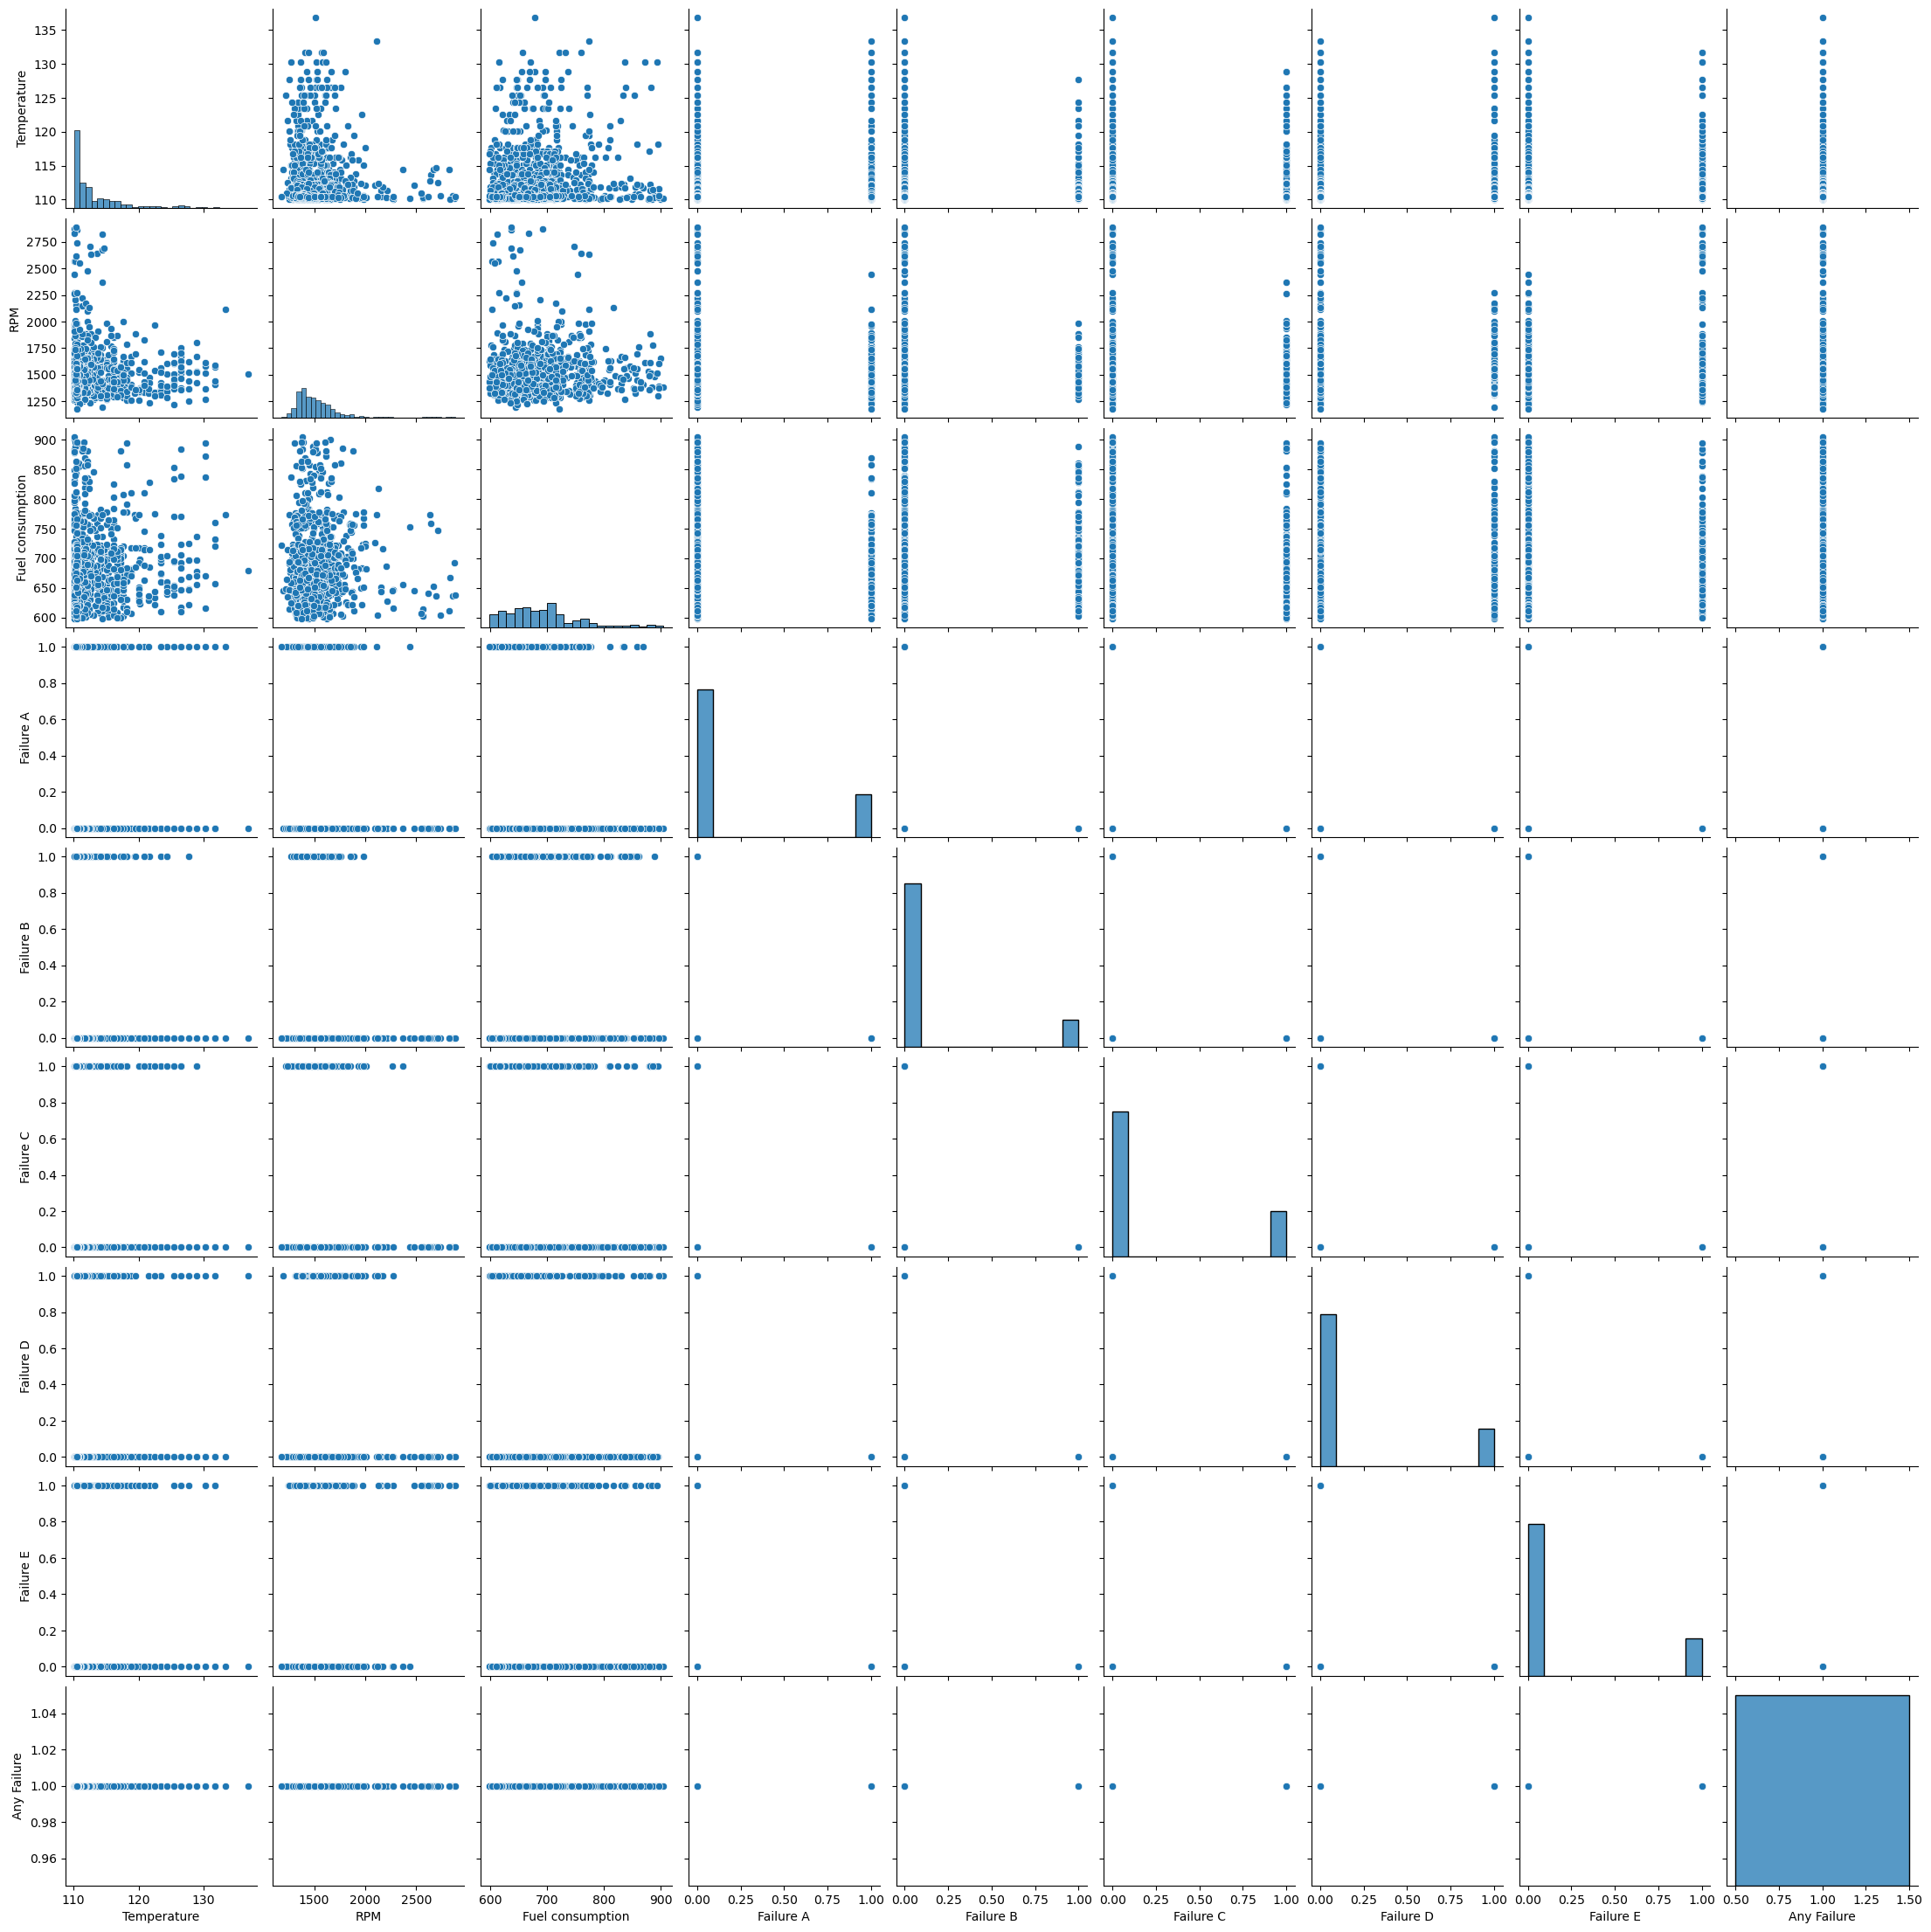

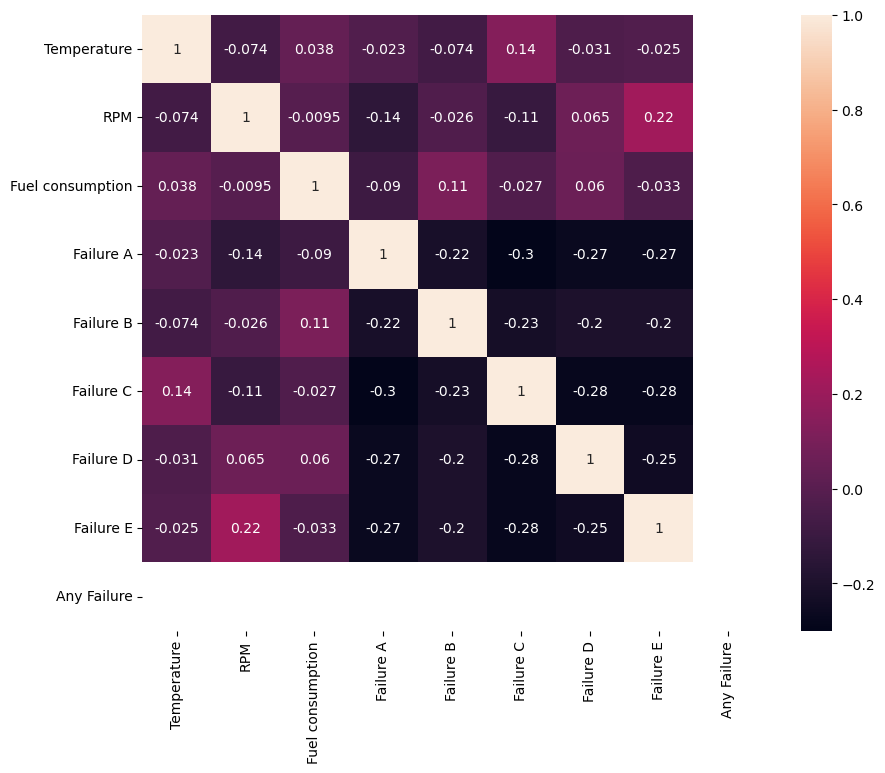

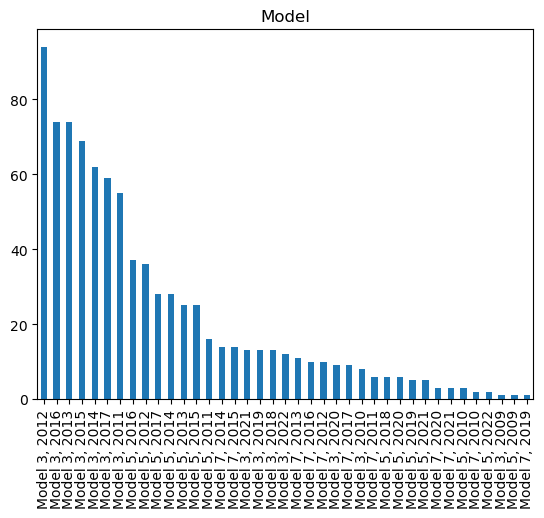

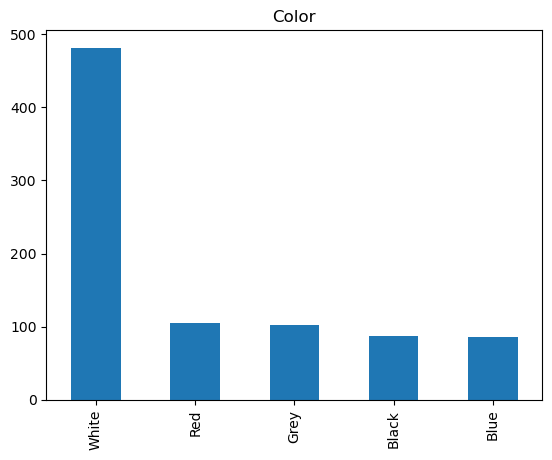

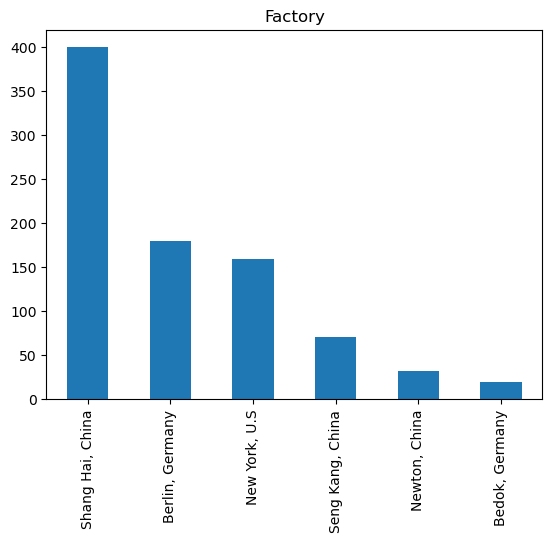

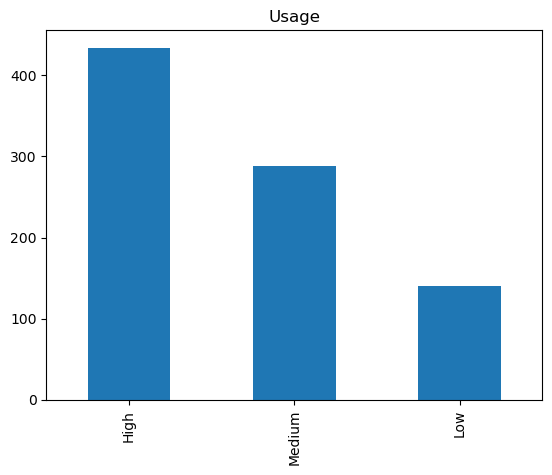

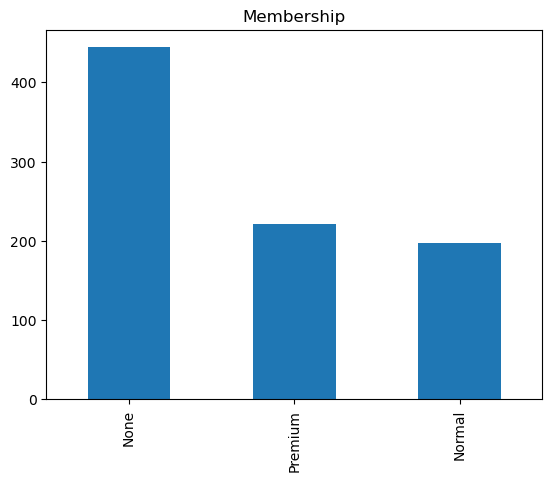

In [440]:
# Get the shape of the DataFrame
print(f'Shape of DataFrame: {dfClean_failures.shape}')

# Get the column types
print(f'Data Types of Columns: \n{dfClean_failures.dtypes}')

# Get the basic statistics of the numerical columns
print(f'Basic Statistics of Numerical Columns: \n{dfClean_failures.describe()}')

# Get the value counts of the categorical columns
print(f'Value Counts of Categorical Columns: \n{dfClean_failures.select_dtypes(include="object").apply(pd.Series.value_counts)}')

# Check for missing values
print(f'Missing Values: \n{dfClean_failures.isnull().sum()}')

# Check for duplicate rows
print(f'Duplicate Rows: {dfClean_failures.duplicated().sum()}')

# Create a pairplot to visualize the relationship between numerical columns
sns.pairplot(dfClean_failures)
plt.show()

# Create a heatmap to visualize the correlation between numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(dfClean_failures.corr(), annot=True)
plt.show()

# # Create a bar plot to visualize the distribution of categorical columns
# dfClean_failures.select_dtypes(include="object").apply(pd.Series.value_counts).plot(kind='bar', stacked=True)
# plt.show()

# Create a bar plot for each categorical column separately, but limit the number of categories plotted
n = 41
for column in dfClean_failures.select_dtypes(include="object").columns:
    if column != "Car ID":
        dfClean_failures[column].value_counts().head(n).plot(kind='bar')
        plt.title(column)
        plt.show()

##### Explore Cars with Failure's Fuel Consumption and RPM data 

###### Fuel consumption

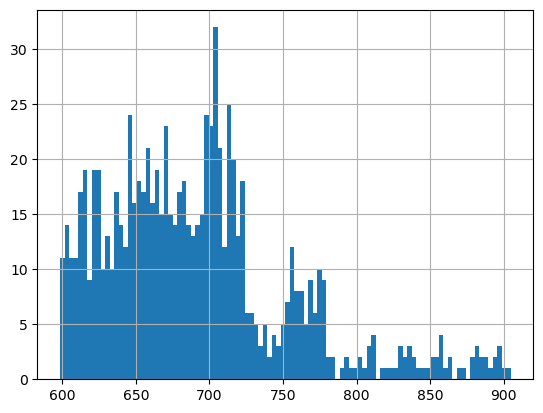

In [441]:
dfClean_failures['Fuel consumption'].hist(bins=100);
plt.interactive(True)

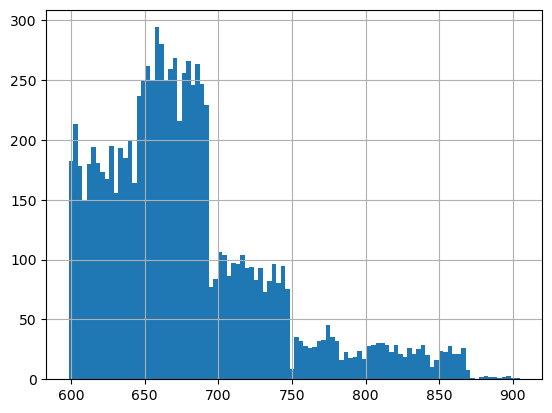

In [442]:
dfClean['Fuel consumption'].hist(bins=100);

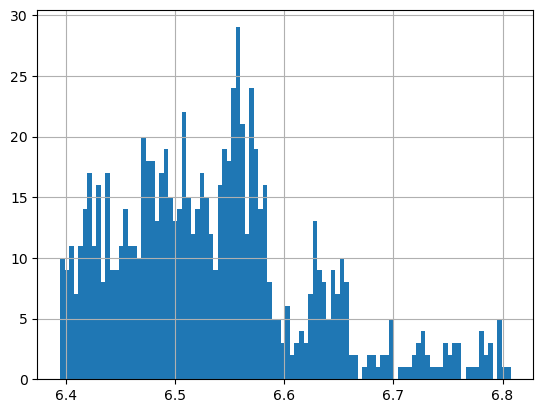

In [443]:
np.log(dfClean_failures['Fuel consumption']).hist(bins=100);

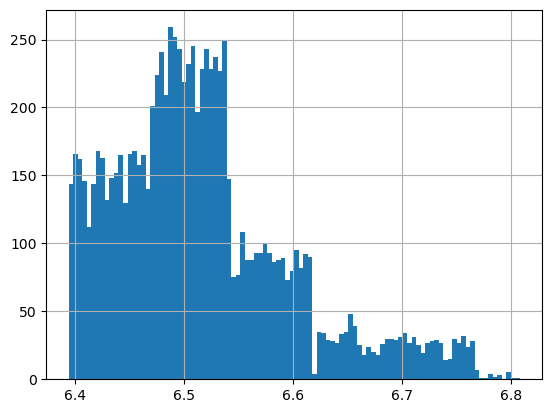

In [444]:
np.log(dfClean['Fuel consumption']).hist(bins=100);

###### RPM data

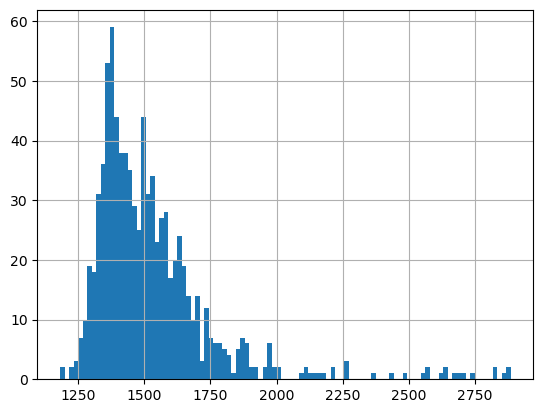

In [445]:
dfClean_failures['RPM'].hist(bins=100);

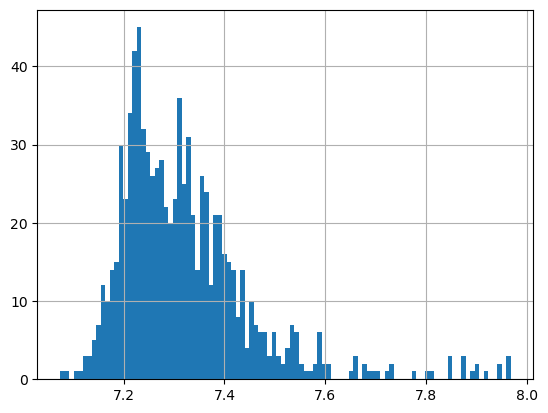

In [446]:
np.log(dfClean_failures['RPM']).hist(bins=100);

<AxesSubplot:>

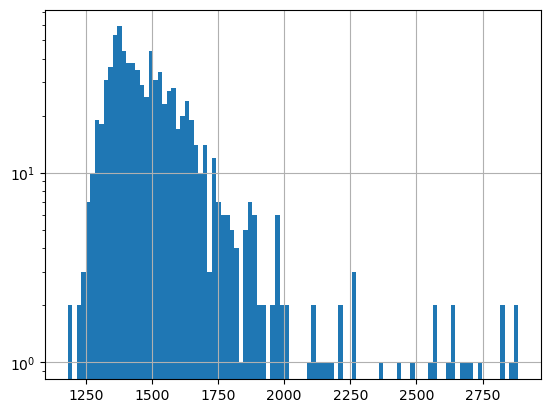

In [447]:
dfClean_failures['RPM'].hist(log=True, bins=100)

##### General Observations: 

- Within failures there seem to be a concentation of occurance (of failure) where:
  - Temperature is between above 115
  - For RPM, in the 1250 and 1500 range 
  - Fuel conumption within the 600 to 780 range 
  - The above could be worth further investigation with a proportionate statistic tests suggested at the end of the notebook (z test).

- All failures have negative relationships with other failures
  - It is likely that most failures A thorugh E get sent to the shop soon after.

- Individual Failure and Coorelation:
  - Failure A has a negative coorelation with RPM, where lower RPM may be a cause of Failure A
  - Failure B: has a relatively higher coorelation with Fuel Consumption. Higher consumption may cause Failure B
  - Failure C: a 0.14 corelation with Temperature & negative coorelations with RPM 
    - Perhaps less RPM result in higher temp which could be related to Failure C worth investigating further
  - Failure D: does not have a notable corelation with Temp, RPM or Fuel Consumption
  - Failure E: has a notable 0.22 corelation with RPM

- Color: White is the most built car model by far, at least four times more than the others. Or equal to all others combined. 
  - This is alsi why most cars that failed are white, proportionate to total cars built
  - Color may not have much to do with failures.
  - Could be investigated with statistic tests below using a null hypothesis of white not being a cause for failure.

- Factory: China built the most cars at least double of other factories
  - Within Failure China does not stand out
  - But it can be worth testing if Berlin has proportionately more failures compared to other factories.

- Usage: High usage seem to have the most failure causes
  - Futher proportionate testing (z test) can confirm this.
  - However it makes logical sense that high usage result in failures

- Membership: Seem to be one of the causes of failure
  - Failed cars seem to have a larger proportionate with no('None') membership status
  - Reduce number of servicing results causes more failure
  - More tests can be devised, but it make sense that it happens.

- removed the following Car to be isolated for separate investigation due to high running temperature or data input error:
  - Car ID: 10484506-1be0-4a86-8dbc-b8b2092b93b2, 
  - Model: Model 3, 2022
  - Color: White
  Temperature: 230.7 °C
  - RPM: 1408
  - Factory: New York, U.S
  - Usage: High
  - Fuel consumption: 660.9
  - Membership: Normal
  - Failure A: 0
  - Failure B: 1
  - Failure C: 0
  - Failure D: 0
  - Failure E: 0


In [448]:
#Breaking down variables for each failure for observation
df_OnlyFailureA = dfClean[dfClean['Failure A'].isin([1])]
df_OnlyFailureB = dfClean[dfClean['Failure B'].isin([1])]
df_OnlyFailureC = dfClean[dfClean['Failure C'].isin([1])]
df_OnlyFailureD = dfClean[dfClean['Failure D'].isin([1])]
df_OnlyFailureE = dfClean[dfClean['Failure E'].isin([1])]

##### Top line of failure rates:

- Recommend to look further into Failures A, C, D as they have a higher rate of occurance relative to B and C.

- Possible design flaw lies in model 3 specifically the 2011, 2012, 2013 models have high rate of failure.
  - To verify this use Statistic test suggested below to test for significance prior to investigation
- Error rate for all failure type is ~9.2% 
  - (862/9405= 0.09165337586)

###### Examining Failure A:

In [449]:
#build into a function that can be used for other failures to identify failure rates:
def compare_failures_to_total_built(df_failures, df_total_built, keywords_list):
    for keywords in keywords_list:
        df_failures_matching_keywords = df_failures.loc[df_failures.Model.apply(lambda x: any(k for k in keywords if k in x))]
        df_total_built_matching_keywords = df_total_built.loc[df_total_built.Model.apply(lambda x: any(k for k in keywords if k in x))]
        failure_count = round(df_failures_matching_keywords['Car ID'].count(),3) #round off to 3 decimal
        total_built_count = round(df_total_built_matching_keywords['Car ID'].count(),3) #round off to 3 decimal
        failure_rate = failure_count / total_built_count
        if failure_rate >= 0.05:
          print('For {}: {} failures out of {} total built or {:.3%}'.format(keywords, failure_count, total_built_count, failure_rate))

keywords_list = [['Model 5, 2022'], ['Model 3, 2022'], ['Model 5, 2021'], ['Model 3, 2021'],
       ['Model 7, 2021'], ['Model 5, 2020'], ['Model 3, 2020'], ['Model 5, 2019'],
       ['Model 7, 2019'], ['Model 3, 2019'], ['Model 5, 2018'], ['Model 3, 2018'],
       ['Model 7, 2018'], ['Model 3, 2017'], ['Model 5, 2017'], ['Model 7, 2017'],
       ['Model 3, 2016'], ['Model 5, 2016'], ['Model 7, 2016'], ['Model 3, 2015'],
       ['Model 7, 2015'], ['Model 5, 2015'], ['Model 3, 2014'], ['Model 5, 2014'],
       ['Model 3, 2013'], ['Model 5, 2013'], ['Model 7, 2013'], ['Model 3, 2012'],
       ['Model 5, 2012'], ['Model 7, 2022'], ['Model 7, 2014'], ['Model 7, 2012'],
       ['Model 5, 2011'], ['Model 3, 2011'], ['Model 7, 2020'], ['Model 7, 2011'],
       ['Model 3, 2010'], ['Model 7, 2010'], ['Model 5, 2010'], ['Model 3, 2009'],
       ['Model 5, 2009']]

print(f'Failure A: \n')
compare_failures_to_total_built(df_OnlyFailureA, dfClean, keywords_list)

Failure A: 

For ['Model 3, 2012']: 39 failures out of 543 total built or 7.182%
For ['Model 5, 2011']: 6 failures out of 81 total built or 7.407%
For ['Model 3, 2011']: 26 failures out of 194 total built or 13.402%
For ['Model 7, 2011']: 2 failures out of 27 total built or 7.407%
For ['Model 3, 2010']: 4 failures out of 29 total built or 13.793%
For ['Model 7, 2010']: 2 failures out of 5 total built or 40.000%
For ['Model 3, 2009']: 1 failures out of 1 total built or 100.000%


In [450]:
def failure_rate_percentage(df_failures, df_total_built, keywords_list):
    for keywords in keywords_list:
        df_failures_matching_keywords = df_failures.loc[df_failures.Factory.apply(lambda x: any(k for k in keywords if k in x))]
        df_total_built_matching_keywords = df_total_built.loc[df_total_built.Factory.apply(lambda x: any(k for k in keywords if k in x))]
        failure_count = df_failures_matching_keywords['Car ID'].count()
        total_built_count = df_total_built_matching_keywords['Car ID'].count()
        failure_rate = failure_count / total_built_count
        print('Failure rate percentage for cars produced in {}: {:.2f}%'.format(keywords[0], failure_rate*100))

keywordsFactory= [['China'],['U.S'],['Germany']]
print(f'Failure A: \n')
failure_rate_percentage(df_OnlyFailureA, dfClean, keywordsFactory)

Failure A: 

Failure rate percentage for cars produced in China: 1.82%
Failure rate percentage for cars produced in U.S: 2.19%
Failure rate percentage for cars produced in Germany: 2.50%


- Model 3 has a high occurance of failure A: 
  - About 77.2% of failure A is from Model 3, 149/193
- Upon further examination, the following models have a high failure rates (>5%) with large sample size (>100) that warrants further examination:
  - [Model 3, 2012]: 39 failures out of 543 total built or 7.182%
  - [Model 3, 2011]: 26 failures out of 194 total built or 13.402%
- Failure model 3s have origins from all factories
- Highest Falure A rate is in Germany
  - Based on the failure rate results: 
    - China: 1.82%
    - U.S: 2.19%
    - Germany: 2.50%  


###### Examining Failure B:

In [451]:
print(f'Failure B: \n')
compare_failures_to_total_built(df_OnlyFailureB, dfClean, keywords_list)

Failure B: 



In [452]:
print(f'Failure B: \n')
failure_rate_percentage(df_OnlyFailureB, dfClean, keywordsFactory)

Failure B: 

Failure rate percentage for cars produced in China: 1.42%
Failure rate percentage for cars produced in U.S: 1.04%
Failure rate percentage for cars produced in Germany: 1.23%


- Failure B has < 5% failure rate in all models
- Mild relative to other Failure types

###### Examining Failure C:

In [453]:
print(f'Failure C: \n')
compare_failures_to_total_built(df_OnlyFailureC, dfClean, keywords_list)

Failure C: 

For ['Model 5, 2016']: 14 failures out of 280 total built or 5.000%
For ['Model 7, 2015']: 6 failures out of 88 total built or 6.818%
For ['Model 3, 2013']: 26 failures out of 517 total built or 5.029%


In [454]:
print(f'Failure C: \n')
failure_rate_percentage(df_OnlyFailureC, dfClean, keywordsFactory)

Failure C: 

Failure rate percentage for cars produced in China: 2.33%
Failure rate percentage for cars produced in U.S: 1.84%
Failure rate percentage for cars produced in Germany: 2.12%


- The following models have a high failure rates (>5%) with large sample size (>100) that warrants further examination:
  - For ['Model 5, 2016']: 14 failures out of 280 total built or 5.000%
  - For ['Model 7, 2015']: 6 failures out of 88 total built or 6.818%
  - For ['Model 3, 2013']: 26 failures out of 517 total built or 5.029%

- Highest Failure C rate is in China at 2.33%


###### Examining Failure D:

In [455]:
print(f'Failure D: \n')
compare_failures_to_total_built(df_OnlyFailureD, dfClean, keywords_list)

Failure D: 

For ['Model 7, 2012']: 5 failures out of 83 total built or 6.024%
For ['Model 5, 2011']: 8 failures out of 81 total built or 9.877%
For ['Model 3, 2011']: 14 failures out of 194 total built or 7.216%
For ['Model 7, 2011']: 2 failures out of 27 total built or 7.407%
For ['Model 3, 2010']: 3 failures out of 29 total built or 10.345%
For ['Model 5, 2010']: 2 failures out of 6 total built or 33.333%
For ['Model 5, 2009']: 1 failures out of 1 total built or 100.000%


In [456]:
print(f'Failure D: \n')
failure_rate_percentage(df_OnlyFailureD, dfClean, keywordsFactory)

Failure D: 

Failure rate percentage for cars produced in China: 1.95%
Failure rate percentage for cars produced in U.S: 1.34%
Failure rate percentage for cars produced in Germany: 1.93%


- The following models have a high failure rates (>5%) with large sample size (>100) that warrants further examination:
    - For ['Model 3, 2011']: 14 failures out of 194 total built or 7.216%
- very similar failure rates from each factory, lowest being the U.S

###### Examining Failure E:

In [457]:
print(f'Failure E: \n')
compare_failures_to_total_built(df_OnlyFailureE, dfClean, keywords_list)

Failure E: 

For ['Model 5, 2010']: 1 failures out of 6 total built or 16.667%


In [458]:
print(f'Failure E: \n')
failure_rate_percentage(df_OnlyFailureE, dfClean, keywordsFactory)

Failure E: 

Failure rate percentage for cars produced in China: 2.01%
Failure rate percentage for cars produced in U.S: 1.49%
Failure rate percentage for cars produced in Germany: 1.65%


- Failure E has < 5% failure rate in all models
- Mild relative to other Failure types

In [459]:
dfClean.shape

(9405, 15)

##### Statistical Tests:

In [460]:
#TBC: Chi square:
#Identify a Color that has the highest (or lowest) failure rate and compare it with the rest.

from scipy.stats import chi2_contingency

# Create a contingency table of color and failure type
color_failure = pd.crosstab(dfClean['Color'], dfClean[['Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E']].any(axis=1))

# Conduct the chi-squared test
chi2, p, dof, expected = chi2_contingency(color_failure)

# Check the p-value
alpha = 0.05
if p < alpha:
    print("The association between car color and failure type is statistically significant, at p=", p)
else:
    print("The association between car color and failure type is not statistically significant, at p=", p)


The association between car color and failure type is not statistically significant, at p= 0.5650291577389513


In [461]:
#TBC: Turn into function:

def compare_failures(df, column):
  
  # Create a contingency table of the chosen column and failure type
  column_failure = pd.crosstab(df[column], df[['Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E']].any(axis=1))

  # Conduct the chi-squared test
  chi2, p, dof, expected = chi2_contingency(column_failure)

  # Check the p-value
  alpha = 0.05
  if p < alpha:
      print(f"The association between {column} and failure type is statistically significant, at p=", p)
  else:
      print(f"The association between {column} and failure type is not statistically significant, at p=", p)

compare_failures(dfClean, 'Model')
compare_failures(dfClean, 'Factory')
compare_failures(dfClean, 'Membership')
compare_failures(dfClean, 'Usage')
compare_failures(dfClean, 'Color')

# compare_failures(dfClean_failures, 'Model')
# compare_failures(dfClean_failures, 'Factory')
# compare_failures(dfClean_failures, 'Membership')
# compare_failures(dfClean_failures, 'Usage')
# compare_failures(dfClean_failures, 'Color')

The association between Model and failure type is statistically significant, at p= 3.872749961172829e-75
The association between Factory and failure type is statistically significant, at p= 3.836299664200277e-265
The association between Membership and failure type is statistically significant, at p= 5.55401296711795e-163
The association between Usage and failure type is statistically significant, at p= 1.4878645166877622e-30
The association between Color and failure type is not statistically significant, at p= 0.5650291577389513


Other potential Statistical tests

- Potential statistical Z test:
  - Can be done for Models, Color, Factory, Usage, Membership. For each Failure Type.
  - For example:
    - If the proportion of Type A failure is significantly higher than the proportion of Type A failure in non-white cars.
    - If the results are significant, then we can conclude that the proportion of type A failure is significantly higher in white cars than non-white cars.
    - Proportion of white car with failure A: (108/5238)
    - Proportion of non white cars with failure A: (27+25+19+14)/(1098+1065+1019+986)

- Potential statistical T test for each failure type:
  - "Temp of Failure A" with the temp of cars that do not have Failure A

